# Phase 4 - Outliers detection and normalization
*TEAM 5*

In [3]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
from scipy.stats import zscore


In [4]:
movies = pd.read_csv('../data/us.movies.actors.tsv', sep='\t', na_values=['\\N'])
print(f'{movies.shape=}')

/Applications/JupyterLab.app/Contents/Resources/jlab_server/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


movies.shape=(9533177, 23)


In [336]:
movies.head()

,tconst,nconst,primaryName,birthYear,deathYear,primaryProfession,titleType,primaryTitle,originalTitle,isAdult,...,genres,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes
0,tt0000574,nm0143899,Godfrey Cass,1866.0,1951.0,actor,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,...,Action,6,The Story of the Kelly Gang,US,NaN,imdbDisplay,NaN,0,6.1,735
1,tt0000574,nm0143899,Godfrey Cass,1866.0,1951.0,actor,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,...,Adventure,6,The Story of the Kelly Gang,US,NaN,imdbDisplay,NaN,0,6.1,735
2,tt0000574,nm0143899,Godfrey Cass,1866.0,1951.0,actor,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,...,Biography,6,The Story of the Kelly Gang,US,NaN,imdbDisplay,NaN,0,6.1,735
3,tt0000574,nm0170118,Bella Cola,NaN,NaN,actress,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,...,Action,6,The Story of the Kelly Gang,US,NaN,imdbDisplay,NaN,0,6.1,735
4,tt0000574,nm0170118,Bella Cola,NaN,NaN,actress,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,...,Adventure,6,The Story of the Kelly Gang,US,NaN,imdbDisplay,NaN,0,6.1,735


## Treating attribute missing and invalid values

Summary of the work done in the Python cells below:

- `tconst`: checking missing values and invalid format of the id, there isn't any of those. However, the attribute has almost only distinct values and should be deleted if during the data mining application.
- `nconst`: checking missing values and invalid format of the id, there isn't any of those. However, as for the previous attribute nconst has a lot of distinct values. It should be removed when data mining is applied.
- `primaryName`: checking missing values, there isn't any. As for the previous two, a lot a distinct values.
- `birthYear`: the missing value rate is above 73% which makes this attribute useless for the learning. 
- `deathYear`: as previously, the missing value rate is high (above 90%). It is understandable as all the actors aren't dead but it still makes this attribute hard to use and he may be irrelevant for the learning algorithm to keep this information.  
- `primaryProfession`: no missing or invalid values in this attribute.
- `titleType`: there aren't any invalid or missing entries for this attribute. There is a strong class imbalance which may lead to the suppression of this attribute but the information given may worth to keep it for now.
- `primaryTitle`: no invalid or missing values but lot of distinct values and 81% of similarity with originalTitle.
- `originalTitle`: no invalid or missing values but lot of distinct values and 81% of similarity with primaryTitle.
- `isAdult`: no invalid or missing entries but a strong class imbalance. However, the given information may be considered by the miner depending on his study.
- `startYear`: No invalid attributes as the range is coherent (1906-2021). 7 movies with missing startYear. They can be deleted regarding the size of the dataset if the purpose is to apply data mining methods. 
- `endYear`: all the values are missing for this attribute. It must be deleted as it doesn't bring any information.
- `runtimeMinutes`: there are some missing values and the value-range is too wide. As this variable may be very important for the analysis, it would be interesting to substitute its missing or invalid values. We identify outliers by computing the z-score. The entries with a too high z-score are omitted (z>10). Using z-score assumes normal distribution of the variable. We can validate this hypothesis afterward with the ditribution plot. These omitted values represent less than 2% of the entries which isn't a big ratio. We replace these values with the median as this replacement method is less sensitive to the distribution and the remaining extreme values.
- `genres`: there are 2094 movies with missing genres. It represents less than 0.2% of the dataset. There isn't any simple way of giving a genre so we would prefer to remove these values. All the other entries are valid.
- `ordering`: by looking at the distribution not any sample seems to be an outlier. There aren't any missing entries for this attribute.
- `title`: no invalid or missing values but lot of distinct values. This attribute has a lot of similarity with primaryTitle and originalTitle. 
- `region`: only one distinct value and there isn't any missing entries. This entry don't bring any information. 
- `language`: with more than 98% of missing entries, this attribute can't be used.
- `types`: there are around 16% or entries missing for this attribute. There is a strong class imbalance in this attribute so it may be possible to replace by the mode. As it adds bias to the dataset, it can be unappropriate to replace these values, we assume that the purpose of the further study won't be mainly focused on the types attribute. 
- `attributes`: with more than 88% percent of missing values, no information can be extracted for data mining purpose. 
- `averageRating`: values of the attribute are in the right range [0-10]. With no missing values.
- `numVotes`: the range of the attribute seems correct (only positive values and the one with the most votes are popular). No missing values.

### `tconst`

In [337]:
print(f'{movies.tconst.nunique()=}')
print(f'{movies.tconst.isna().sum()=}')

movies.tconst.nunique()=144901
movies.tconst.isna().sum()=0


In [338]:
is_tconst_format = lambda x: bool(re.match('tt[0-9]+', x))
movies.tconst.map(is_tconst_format).sum()

9533177

No missing and/or invalid values, lot of distinct values.

### `nconst`

In [339]:
print(f'{movies.nconst.nunique()=}')
print(f'{movies.nconst.isna().sum()=}')

movies.nconst.nunique()=1336807
movies.nconst.isna().sum()=0


In [340]:
is_nconst_format = lambda x: bool(re.match('nm[0-9]+', x))
movies.nconst.map(is_nconst_format).sum()

9533177

No missing and/or invalid values, lot of distinct values.

### `primaryName`

In [341]:
print(movies.primaryName.isna().sum())

0


In [342]:
print(f'{movies.primaryName.nunique()=}')

movies.primaryName.nunique()=1243637


No missing values, lot of distinct values.

### `Birth year`

In [343]:
movies.birthYear.isna().mean()

0.7325901952727826

The missing value rate is above 73% which may make this attribute useless for the learning. 

### `deathYear`

In [344]:
movies.deathYear.isna().mean()

0.9134920079633474

The missing value rate is above 90%. It is understandable as all the actors aren't dead but it still makes this attribute hard to use and he may be irrelevant for the learning algorithm to keep this information.

### `primaryProfession`

In [345]:
movies.primaryProfession.isna().sum()

0

In [346]:
movies.primaryProfession.unique()

array(['actor', 'actress', 'assistant_director', 'cinematographer',
       'producer', 'director', 'writer', 'production_designer', 'editor',
       'editorial_department', 'make_up_department', 'soundtrack',
       'location_management', 'miscellaneous', 'sound_department',
       'visual_effects', 'production_manager', 'animation_department',
       'stunts', 'art_department', 'camera_department',
       'costume_department', 'casting_director', 'script_department',
       'special_effects', 'composer', 'music_department', 'set_decorator',
       'costume_designer', 'art_director', 'talent_agent',
       'casting_department', 'transportation_department', 'executive',
       'manager', 'publicist', 'legal', 'assistant',
       'production_department'], dtype=object)

No missing or invalid value in this attribute.

### `titleType`

In [347]:
movies.titleType.isna().sum()

0

In [348]:
movies.titleType.value_counts()

movie      9293662
tvMovie     239515
Name: titleType, dtype: int64

There aren't any invalid or missing entries for this attribute. There is a strong class imbalance which may lead to the suppression of this attribute but the information given may worth to keep it for now.

### `primaryTitle` / `originalTitle`

In [349]:
print(f'{movies.primaryTitle.isna().sum()=}')
print(f'{movies.primaryTitle.nunique()=}')

movies.primaryTitle.isna().sum()=0
movies.primaryTitle.nunique()=127216


In [350]:
print(f'{movies.originalTitle.isna().sum()=}')
print(f'{movies.originalTitle.nunique()=}')

movies.originalTitle.isna().sum()=0
movies.originalTitle.nunique()=132426


Very similar attributes with no missing values and almost the same number of unique values. We compare the two element-wise with the main title variable.

### `title`

In [351]:
print(f'{movies.title.isna().sum()=}')
print(f'{movies.title.nunique()=}')

movies.title.isna().sum()=0
movies.title.nunique()=151466


In [352]:
movies.primaryTitle.eq(movies.title).sum()/movies.shape[0]

0.7136018768979113

In [353]:
movies.originalTitle.eq(movies.title).sum()/movies.shape[0]

0.5704457181483151

71% and 57% of similarity between the variables is a lot of correlation. These variables convey the same information. Only one should be kept. As title has more unique entries (with no missing values), we'll keep this one. Note: isOriginalTitle is linked with originalTitle. 

### `isAdult`

In [354]:
movies.isAdult.isna().sum()

0

In [355]:
movies.isAdult.value_counts()

0    9470917
1      62260
Name: isAdult, dtype: int64

No invalid or missing entries but a strong class imbalance. However, the given information may be considered by the miner depending on his study.

### `startYear`

In [356]:
movies.loc[movies.startYear.isna(), :][['title', 'startYear']].drop_duplicates()

,title,startYear
831706,The Money (1976),NaN
831707,Atlantic City Jackpot,NaN
5162699,Samhain,NaN
7246798,As Words Breathe,NaN
7494776,Untitled Chris Black Project,NaN
7494777,Reckless,NaN
9026410,Cool as Hell 2,NaN
9483594,Patriot Acts,NaN


In [357]:
movies.startYear.describe()

count    9.532977e+06
mean     2.001254e+03
std      1.933296e+01
min      1.906000e+03
25%      1.995000e+03
50%      2.008000e+03
75%      2.015000e+03
max      2.021000e+03
Name: startYear, dtype: float64

In [358]:
print(f'{movies.startYear.min()=}')
print(f'{movies.startYear.max()=}')

movies.startYear.min()=1906.0
movies.startYear.max()=2021.0


No invalid attributes as the range is correct. 7 movies have empty startYear values, this small amount can be deleted, for the movie The Money (1976) we can fill the value.

### `endYear`

In [359]:
movies.endYear.isna().sum()/movies.shape[0]

1.0

All the values are missing for this attribute. It must be deleted as it doesn't bring any information.

### `runtimeMinutes`

In [360]:
print(f'{movies.runtimeMinutes.isna().sum()=}')

print(f'{movies.runtimeMinutes.min()=}')
print(f'{movies.runtimeMinutes.max()=}')

movies.runtimeMinutes.isna().sum()=180896
movies.runtimeMinutes.min()=6.0
movies.runtimeMinutes.max()=5220.0


The are some missing values and the range is too wide. As this variable is very important it would be interesting to substitute its missing or invalid values.

In [361]:
scores = np.abs(zscore(movies.runtimeMinutes, nan_policy='omit'))

In [362]:
(scores<10).mean()

0.9807792302608039

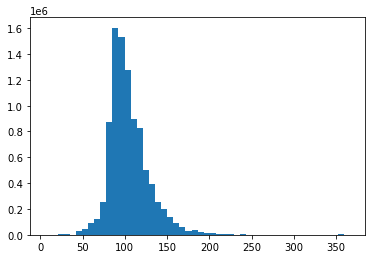

In [363]:
plt.hist(movies.runtimeMinutes[scores<10], bins=50)
plt.show()

We identify outliers by computing the z-score. The entries with a too high z-score are omitted (z>10). Using z-score assumes normal distribution of the variable. We can validate this hypothesis afterward with the ditribution plot. These omitted values represent less than 2% of the entries which isn't a big ratio. We replace these values with the median as this replacement method is less sensitive to the distribution and the remaining extreme values.

### `genres`

In [364]:
movies.genres.isna().sum()/movies.shape[0]

0.0017653086688729266

In [365]:
movies.loc[movies.genres.isna(), ['title', 'genres']].drop_duplicates()

,title,genres
169,The Infant at Snakeville,NaN
294,As You Like It,NaN
1328,A Venetian Night,NaN
1331,When the Earth Trembled,NaN
1332,When the Earth Trembled or the Power of Love,NaN
...,...,...
9500687,Music Hole,NaN
9508283,Zombie Universe 2,NaN
9511508,Little Wound's Warriors,NaN
9512400,Full Gas,NaN


In [366]:
movies.genres.value_counts().head(10)

Drama        2009167
Comedy       1343761
Action       1143471
Adventure     718616
Thriller      631203
Crime         589182
Romance       557157
Horror        528519
Sci-Fi        398025
Mystery       273825
Name: genres, dtype: int64

There are 2094 movies with missing genres. It represents less than 0.2% of the dataset. There isn't any simple way of giving a genre so we would prefer to remove these values. All the other entries are valid.

### `ordering`

In [367]:
movies.ordering.isna().sum()

0

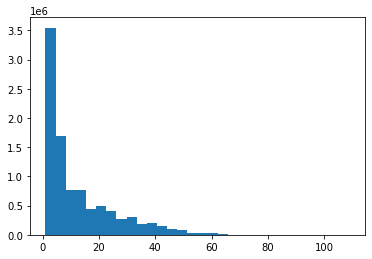

In [368]:
plt.hist(movies.ordering, bins = 30)
plt.show()

By looking at the distribution not any sample seems to be an outlier. There aren't any missing entries for this attribute.

### `region`

In [369]:
movies.region.value_counts()

US    9533177
Name: region, dtype: int64

Only one distinct value and there isn't any missing entries. This entry don't give any information. 

### `language`

In [370]:
movies.language.isna().sum()/movies.shape[0]

0.9827048212783629

In [371]:
movies.language.value_counts()

en     139873
es      23256
yi       1317
haw       324
hi        108
Name: language, dtype: int64

With more than 98% of missing entries, this attribute can't be used.

### `types`

In [372]:
movies.types.isna().sum()/movies.shape[0]

0.15604609040616785

In [373]:
movies.types.value_counts()

imdbDisplay         6419666
working             1184169
alternative          255744
dvd                   69574
video                 64366
festival              28002
tv                    22637
original                450
videoworking           321
tvworking              232
tvvideo                176
festivalworking        147
dvdvideo                78
Name: types, dtype: int64

There are around 16% or entries missing for this attribute. There is a strong class imbalance in this attribute so it may be possible to replace by the mode imbdDisplay. As it adds bias to the dataset, it can be unappropriate to replace these values, we assume that the purpose of the further study won't be mainly focused on the types attribute. 

### `attributes`

In [374]:
movies.attributes.isna().sum()/movies.shape[0]

0.8847884603422342

With more than 88% percent of missing values this attribute can't be used for data mining. 

### `averageRating`

movies.averageRating.isna().sum()=0
movies.averageRating.min()=1.0
movies.averageRating.max()=10.0


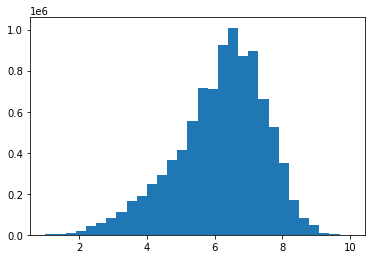

In [375]:
print(f'{movies.averageRating.isna().sum()=}')

print(f'{movies.averageRating.min()=}')
print(f'{movies.averageRating.max()=}')

plt.hist(movies.averageRating, bins=30)
plt.show()

Values of the attribute are in the right range [0-10]. With no missing values.

### `numVotes`

movies.numVotes.isna().sum()=0
movies.numVotes.min()=5
movies.numVotes.max()=2479369


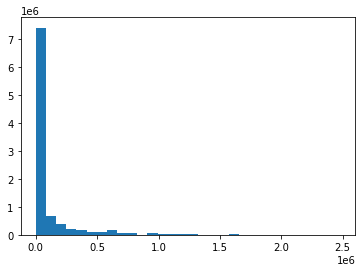

In [376]:
print(f'{movies.numVotes.isna().sum()=}')

print(f'{movies.numVotes.min()=}')
print(f'{movies.numVotes.max()=}')

plt.hist(movies.numVotes, bins=30)
plt.show()

In [377]:
movies.sort_values('numVotes', ascending=False)[['numVotes', 'title']].drop_duplicates().head(10)

,numVotes,title
2041747,2479369,The Shawshank Redemption
2041572,2479369,Rita Hayworth and Shawshank Redemption
4500618,2433653,Batman Begins 2
4500557,2433653,Rory's First Kiss
4500619,2433653,The Dark Knight: The IMAX Experience
4500620,2433653,The Dark Knight
4500558,2433653,Batman: The Dark Knight
4500559,2433653,Untitled Batman Begins Sequel
4500560,2433653,Winter Green
5921153,2183856,Inception: The IMAX Experience


The range of the attribute seems correct (only positive values and the one with the most votes are popular). No missing values.

# Replacement and column removal

In [378]:
out = movies.copy().drop(
        ['birthYear', 'deathYear', 'primaryTitle', 'originalTitle', 'isOriginalTitle', 'endYear', 'region', 'language', 'attributes'],
        axis=1
    )

In [379]:
out.loc[out.title == "The Money (1976)", 'startYear'] = 1976
out.loc[out.title == "Samhain", 'startYear'] = 2020
out.loc[out.title == "As Words Breath", 'startYear'] = 2018
out.loc[out.title == "Reckless", 'startYear'] = 1984
out.loc[out.title == "Cool as Hell 2", 'startYear'] = 2019
out.loc[out.title == "Patriot Acts", 'startYear'] = 2004
out.loc[out.title == "Atlantic City Jackpot", 'startYear'] = 1976

out.loc[out.types.isna(), 'types'] = 'imbdDisplay'

out = out.dropna(axis=0, subset= ['startYear'])
out = out.dropna(axis=0, subset= ['genres'])

out.loc[ np.abs(zscore(out.runtimeMinutes, nan_policy='omit')) >10, 'runtimeMinutes'] = np.nan
out.loc[out.runtimeMinutes.isna(), 'runtimeMinutes'] = np.nanquantile(out.runtimeMinutes.values, .5)

In [380]:
out.reset_index(drop=True, inplace=True)

In [381]:
out.head(5)

,tconst,nconst,primaryName,primaryProfession,titleType,isAdult,startYear,runtimeMinutes,genres,ordering,title,types,averageRating,numVotes
0,tt0000574,nm0143899,Godfrey Cass,actor,movie,0,1906.0,70.0,Action,6,The Story of the Kelly Gang,imdbDisplay,6.1,735
1,tt0000574,nm0143899,Godfrey Cass,actor,movie,0,1906.0,70.0,Adventure,6,The Story of the Kelly Gang,imdbDisplay,6.1,735
2,tt0000574,nm0143899,Godfrey Cass,actor,movie,0,1906.0,70.0,Biography,6,The Story of the Kelly Gang,imdbDisplay,6.1,735
3,tt0000574,nm0170118,Bella Cola,actress,movie,0,1906.0,70.0,Action,6,The Story of the Kelly Gang,imdbDisplay,6.1,735
4,tt0000574,nm0170118,Bella Cola,actress,movie,0,1906.0,70.0,Adventure,6,The Story of the Kelly Gang,imdbDisplay,6.1,735


# Normalization

## numVotes

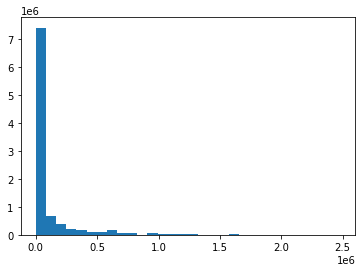

In [396]:
plt.hist(movies.numVotes,bins=30)
plt.show()

The plot of numVotes appears to be a logarithmic curve, which leads to the choice that this column can be normalized using logarithmic normalization. 
Like a histogram, this represents the column data as exponential values. Having too many unique values is bad for an algorithim, so this function transforms the data into values that denotes their 'size'. 

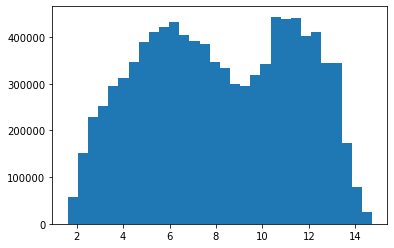

In [397]:
out.numVotes = np.log(movies.numVotes)
plt.hist(out.numVotes,bins=30)
plt.show()

The reason for using the log scaling is that as as the number of ratings increases, the relevance of every digit decreases. This allows an algorithm to focus on the overall weight of votes instead of trying to correlate all the unique numbers of votes. 
Movies with 10-100 votes will have a meaningful difference in the data while 2,464,508 votes versus 2,463,508 will only be a small change. 

## birthYear / deathYear

Birth and death year are categories that are mostly populated with entries within the last century, but there are outliers. The raw data itself would require processing to understand the correlations it may have, so it would be easier to normalize it in a way which best highlights the traits of the dates provided.

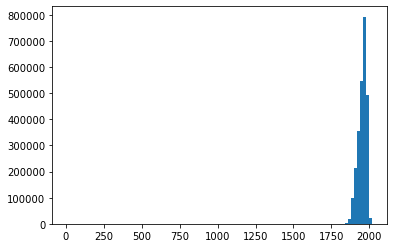

15 Lowest Birth Year Entries
  12.0
  12.0
  12.0
  12.0
  21.0
  21.0
  21.0
  21.0
  21.0
  21.0
  21.0
  21.0
1088.0
1088.0
1088.0


In [398]:
out.birthYear = movies.birthYear.copy()
plt.hist(out.birthYear,bins=100)
plt.show()
print("15 Lowest Birth Year Entries")
print(out.birthYear.nsmallest(15).to_string(index=False))

Printing out the 16 smallest values of birth year, the values below 1800 are outliers and should be adjusted for the normalization. In this case, replacing with the mode ensures every entry still has a birth year, and this should not bias the data in any way as it is only 12 new entries for a value that has 80,000+ representations.

Old out.birthYear.mean()=1952.704510914224


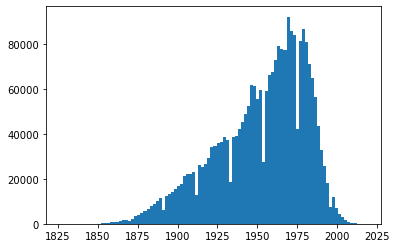

New out.birthYear.mean()=1952.7146443330662
out.birthYear.min()=1827.0


In [399]:
print(f"Old {out.birthYear.mean()=}")
out.birthYear.loc[out.birthYear<1800]=out.birthYear.mode()
plt.hist(out.birthYear,bins=100)
plt.show()
print(f"New {out.birthYear.mean()=}")
print(f"{out.birthYear.min()=}")

With the outliers set to the mean, the chart is unchanged along with the mean. The changing of these outliers affected the mean by 0.1 years, which is statistically insignificant and the data should not have been biased in any way by this adjustment.

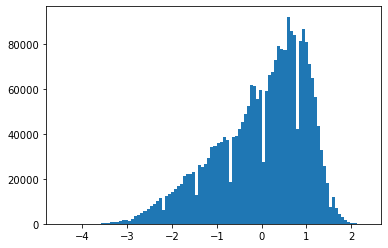

out.birthYear.min()=-4.472800763302281
out.birthYear.max()=2.3227873746027594


In [386]:
out.birthYear = (out.birthYear - out.birthYear.mean()) / (out.birthYear.std())
plt.hist(out.birthYear,bins=100)
plt.show()
print(f"{out.birthYear.min()=}")
print(f"{out.birthYear.max()=}")

Because the std dev normalization is mainly concentrated around the -2 to 2 range, this gives meaningful values to the normalization output as older dates are easier to spot if they fall outside the average year of birth. 
A positive value can correlate to an overall younger actor, as their birth year will be further up in the range of years. 
This normalization should also be applied to death years, as these two attributes represent similar factors and could confuse an algorithim if the mappings were wildly different

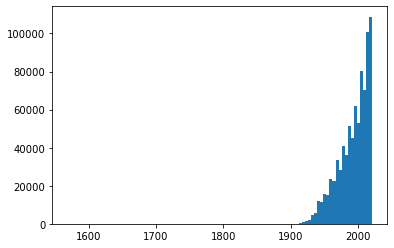

out.deathYear.min()=1569.0
out.deathYear.max()=2021.0
out.deathYear.std()=22.16091521753601


In [400]:
out.deathYear = movies.deathYear.copy()
plt.hist(out.deathYear,bins=100)
plt.show()
print(f"{out.deathYear.min()=}")
print(f"{out.deathYear.max()=}")
print(f"{out.deathYear.std()=}")

As noted, the standard deviation is high for this dataset. This is useful when combined with std dev normalizing as it translates the data into information more about the comparison or relationship of a year to the general context. An actor who died in the 1600's had a very different expereince than those who passed recently, thus this comparison highlights these factors.

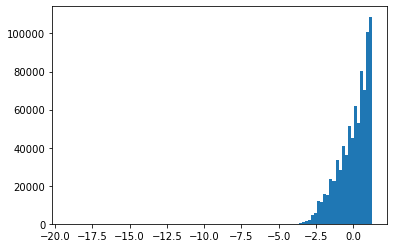

In [388]:
out.deathYear= (out.deathYear - out.deathYear.mean()) / (out.deathYear.std())
plt.hist(out.deathYear,bins=100)
plt.show()

The std dev normalization is even more apparent here, as the chart of death years is strongly weighted to the right. Similar to the birth years, this gives entries in the 'normal' range a similar output, while less recent death years will appear as a larger statistical variance and can be treated as such.

## Average Rating

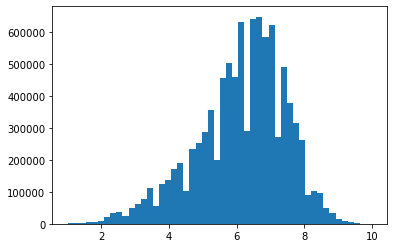

In [389]:
out.averageRating = movies.averageRating.copy()
plt.hist(out.averageRating,bins=50)
plt.show()

The plot and nature of the data collected means that it will fall within a range of 0-10. Because this attribute is already represented on a linear scale with a defined range, it's best to apply a simple standard normalization to the column

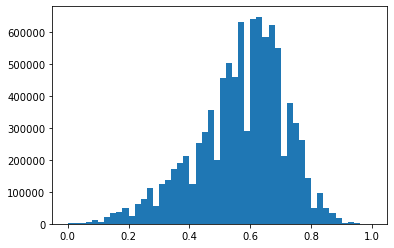

In [390]:
out.averageRating = (out.averageRating - out.averageRating.min()) / (out.averageRating.max() - out.averageRating.min())
plt.hist(out.averageRating,bins=50)
plt.show()

## Runtime Minutes

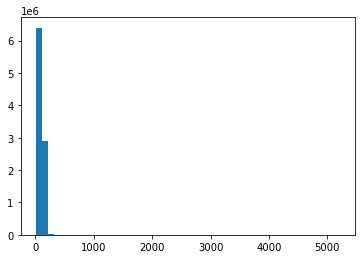

Five Shortest Runtimes
6.0
6.0
6.0
6.0
6.0

Five Longest Runtimes
5220.0
5220.0
5220.0
5220.0
5220.0

out.runtimeMinutes.mean()=104.95992128692514


In [391]:
out.runtimeMinutes = movies.runtimeMinutes.copy()
plt.hist(out.runtimeMinutes,bins=50)
plt.show()
print("Five Shortest Runtimes")
print(out.runtimeMinutes.nsmallest(5).to_string(index=False))
print("\nFive Longest Runtimes")
print(out.runtimeMinutes.nlargest(5).to_string(index=False))
print(f"\n{out.runtimeMinutes.mean()=}")

This plot highlights important aspects of this data, the mean is 104 minutes but there are extreme values for both short and long runtimes. This would likely be best represented using the soft max function. Calculating the standard dev and then normalizing it allows all the entires to be fairly represented while also retaining enough information to compare similar runtimes.

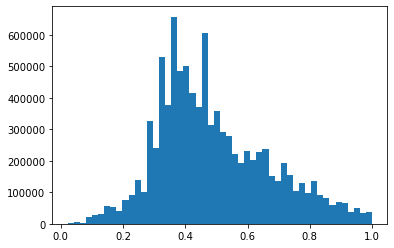

out.runtimeMinutes.min() = 0.02226362296680541
out.runtimeMinutes.max() = 1.0
out.runtimeMinutes.mean() = 0.4894335559200213


In [392]:
out.runtimeMinutes = (out.runtimeMinutes - out.runtimeMinutes.mean()) / (out.runtimeMinutes.std())
out.runtimeMinutes = 1 / (1 + np.exp(-out.runtimeMinutes))
plt.hist(out.runtimeMinutes,bins=50)
plt.show()
print(f"{out.runtimeMinutes.min() = }")
print(f"{out.runtimeMinutes.max() = }")
print(f"{out.runtimeMinutes.mean() = }")

The outliers are now represented while the general runtime range is condensed near 0.4. The actual runtime does not matter, but this now represents the runtime length as a comparison to the average. 

If the runtime value is at one end of the range, it can indicate that the runtime was dramatically different than the norm and can be used to correlate accordingly.

## Start Year

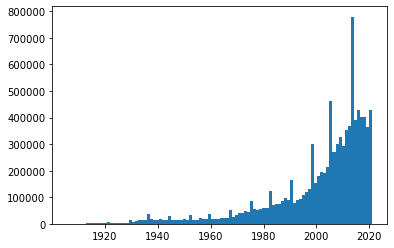

In [393]:
out.startYear = movies.startYear.copy()
plt.hist(out.startYear,bins=100)
plt.show()

From the earlier cleaning and subsequent charting of the start year column, the start year has a set range and a heavy weighting to one side. The weighting can be a useful attribute to capture, so a std dev normalization would be a good option. 
This gives a general sense of movies which were released "recently", and older titles are easy to categorize by checking if their value is outside of the -1 to 1 range.

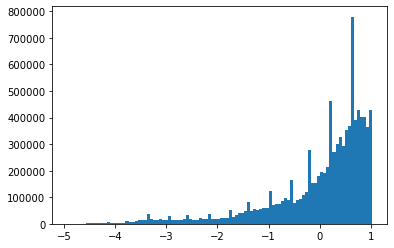

out.startYear.min() = -4.925071811109718
out.startYear.max() = 1.02299339444182
out.startYear.mean() = 3.402918340051949e-15
out.startYear.mode().to_string(index=False) = '0.764382'


In [394]:
out.startYear = (out.startYear-out.startYear.mean())/out.startYear.std()
plt.hist(out.startYear,bins=100)
plt.show()
print(f"{out.startYear.min() = }")
print(f"{out.startYear.max() = }")
print(f"{out.startYear.mean() = }")
print(f"{out.startYear.mode().to_string(index=False) = }")

The final normaliation shows the claim made earlier, with movies 1980-2021 falling within the -1 to 1 range, and titles that are older will have a resulting value lower than -1. 

In [395]:
out.to_csv( "out.tsv" , sep='\t', encoding='utf-8', index = False)